In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# 配置路径

In [6]:
data_path = 'data/'
tmp_res_path = 'tmp_results/'


# 读取数据

In [12]:
# 读取数据函数
def read_data(file_name):

    df = pd.read_csv(data_path + file_name)
    df.drop_duplicates(inplace=True)
    
    return df

# train & test
test_data = read_data(file_name='test_format1.csv')
train_data = read_data(file_name='train_format1.csv')

# user_info & user_log
user_info = read_data(file_name='user_info_format1.csv')
user_log = read_data(file_name='user_log_format1.csv')



In [13]:
test_data.head()

,user_id,merchant_id,prob
0,163968,4605,NaN
1,360576,1581,NaN
2,98688,1964,NaN
3,98688,3645,NaN
4,295296,3361,NaN


In [14]:
train_data.head()

,user_id,merchant_id,label
0,34176,3906,0
1,34176,121,0
2,34176,4356,1
3,34176,2217,0
4,230784,4818,0


In [15]:
user_info.head()

,user_id,age_range,gender
0,376517,6.0,1.0
1,234512,5.0,0.0
2,344532,5.0,0.0
3,186135,5.0,0.0
4,30230,5.0,0.0


In [16]:
user_log.head()

,user_id,item_id,cat_id,seller_id,brand_id,time_stamp,action_type
0,328862,323294,833,2882,2661.0,829,0
1,328862,844400,1271,2882,2661.0,829,0
2,328862,575153,1271,2882,2661.0,829,0
3,328862,996875,1271,2882,2661.0,829,0
4,328862,1086186,1271,1253,1049.0,829,0


# 缺失值

In [9]:
user_info = read_data(file_name='user_info_format1.csv')
user_info.head()

,user_id,age_range,gender
0,376517,6.0,1.0
1,234512,5.0,0.0
2,344532,5.0,0.0
3,186135,5.0,0.0
4,30230,5.0,0.0


In [20]:
# shape统计样本个数 count统计不为空的数据个数
# 查看年龄字段age_range的缺失情况 
# 1. missing rate
missing_rate = (user_info.shape[0] - user_info['age_range'].count()) / user_info.shape[0]
print('Missing rate is: ', missing_rate)

# 2. 统计不为空的数据个数
user_info[user_info['age_range'].isna() | (user_info['age_range'] == 0)].count()

# 3. distribution
user_info.groupby(['age_range'])[['user_id']].count()

Missing rate is:  0.005226677982884221


,user_id
age_range,
0.0,92914
1.0,24
2.0,52871
3.0,111654
4.0,79991
5.0,40777
6.0,35464
7.0,6992
8.0,1266


In [21]:
# 数据分布

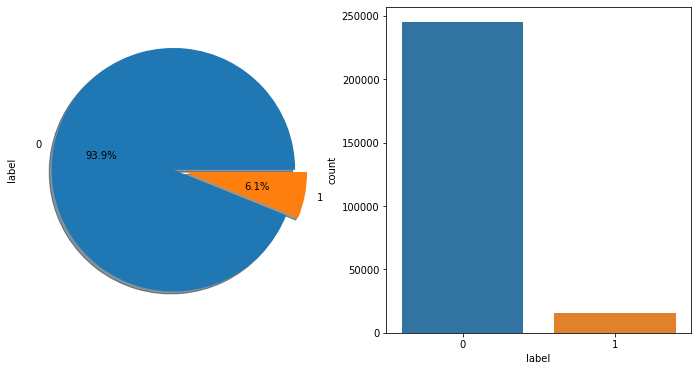

In [25]:
label_gp = train_data.groupby('label')['user_id'].count()
label_gp
_, axe = plt.subplots(1, 2, figsize=(12, 6))
train_data.label.value_counts().plot(kind='pie', autopct='%1.1f%%', shadow=True, explode=[0, 0.1], ax=axe[0])
sns.countplot('label', data=train_data, ax=axe[1])